**Credit Scoring Model**

In [122]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 1000
data = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=n_samples),
    'Income': np.random.randint(30000, 120000, size=n_samples),
    'Loan_Amount': np.random.randint(5000, 50000, size=n_samples),
    'Credit_Score': np.random.randint(600, 800, size=n_samples),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed', 'Self-Employed'], size=n_samples),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], size=n_samples),
    'Number_of_Dependents': np.random.randint(0, 5, size=n_samples),
    'Creditworthy': np.random.randint(0, 2, size=n_samples)  # 0 or 1
})

# Save to CSV
data.to_csv('credit_data.csv', index=False)

print("Synthetic dataset created and saved as 'credit_data.csv'.")



Synthetic dataset created and saved as 'credit_data.csv'.


In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Load dataset
data = pd.read_csv('credit_data.csv')

In [124]:
# Identify features and target
features = ['Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Employment_Status', 'Marital_Status', 'Number_of_Dependents']
target = 'Creditworthy'

# Preprocessing
# Handle missing values and encode categorical features
categorical_features = ['Employment_Status', 'Marital_Status']
numerical_features = ['Age', 'Income', 'Loan_Amount', 'Credit_Score']

# Define preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [125]:
# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    # Create a pipeline that combines preprocessing and model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}\n")

# Voting Classifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier())
], voting='soft')

voting_clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', voting_clf)])

voting_clf_pipeline.fit(X_train, y_train)
y_pred = voting_clf_pipeline.predict(X_test)

print(f"Voting Classifier")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, voting_clf_pipeline.predict_proba(X_test)[:, 1])}\n")

Model: Logistic Regression
Confusion Matrix:
[[22 80]
 [18 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.22      0.31       102
           1       0.50      0.82      0.62        98

    accuracy                           0.51       200
   macro avg       0.53      0.52      0.47       200
weighted avg       0.53      0.51      0.46       200

ROC AUC Score: 0.4516806722689075

Model: SVC
Confusion Matrix:
[[34 68]
 [29 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.33      0.41       102
           1       0.50      0.70      0.59        98

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.52      0.52      0.50       200

ROC AUC Score: 0.5419167667066828

Model: Random Forest
Confusion Matrix:
[[45 57]
 [41 57]]
Classification Report:
              precision    recall  f1

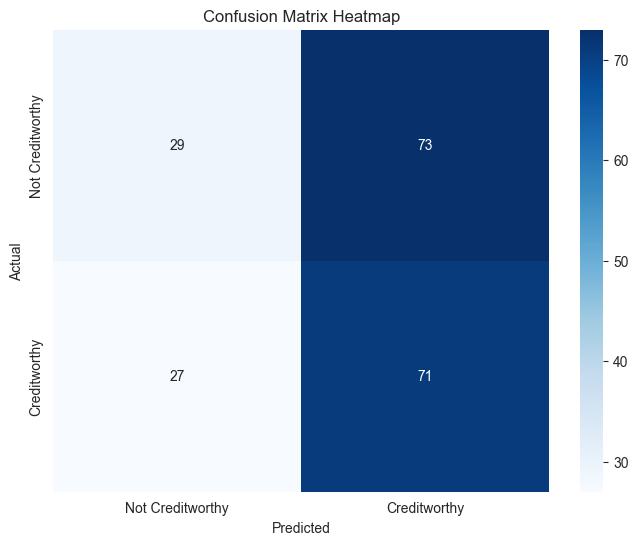

In [127]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# Plot confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Creditworthy', 'Creditworthy'], 
            yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()